## Problem Statement

To predict the fare of the taxi ride using Random Forest given pickup and
drop-off locations, the pickup timestamp, and the passenger count
Data Understanding

>unique_id= A unique identifier or key for each record in the dataset

>date_time_of_pickup= The time when the ride started

>longitude_of_pickup= Longitude of the taxi ride pickup point

>latitude_of_pickup= Latitude of the taxi ride pickup point

>longitude__of_dropoff= Longitude of the taxi ride dropoff point

>latitude_of_dropoff= Latitude of the taxi ride dropoff

>point no_of_passenger= count of the passengers during the ride

>Amount= (target variable) dollar amount of the cost of the taxi ride

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

**Data Reading**

In [32]:
mydf = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")
mydf.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


**Data Preparation**

In [33]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [34]:
mydf.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [35]:
mydf.replace("?", np.nan, inplace=True)
mydf.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [36]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [37]:
mydf["date_time_of_pickup"].value_counts()

2011-09-03 01:30:00 UTC    3
2014-05-30 23:38:00 UTC    3
2012-06-28 20:54:00 UTC    3
2011-02-11 13:19:00 UTC    3
2014-05-30 10:50:00 UTC    2
                          ..
2011-10-07 00:24:25 UTC    1
2015-04-02 06:47:05 UTC    1
2011-01-09 10:09:58 UTC    1
2012-10-27 18:11:00 UTC    1
2010-01-13 08:13:14 UTC    1
Name: date_time_of_pickup, Length: 49555, dtype: int64

Since amount is target variable, we do check its more details like min, max, mean, mode and so on.

In [38]:
mydf["amount"].describe()

count    50000.000000
mean        11.364171
std          9.685557
min         -5.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        200.000000
Name: amount, dtype: float64

In [39]:
inde = mydf[mydf["amount"]<2.5].index
inde

Int64Index([2039, 2486, 2780, 10002, 13032, 27891, 28839, 36722, 42337, 47302], dtype='int64')

In [40]:
#dropping the rows which have amount less than 2.5 because in New York, price can't be less than 2.5 dollar

mydf.drop(inde, inplace=True)

<Axes: xlabel='no_of_passenger'>

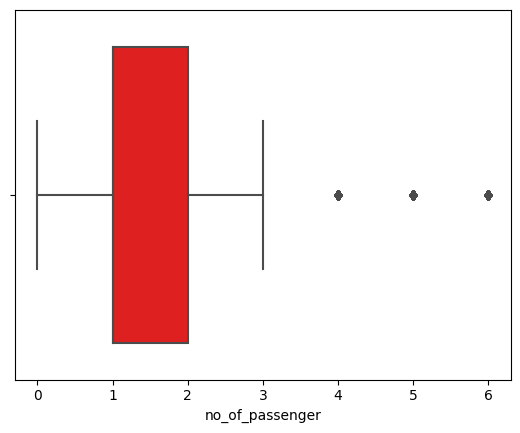

In [41]:
sns.boxplot(data=mydf, x="no_of_passenger", color="red")

<Axes: xlabel='amount'>

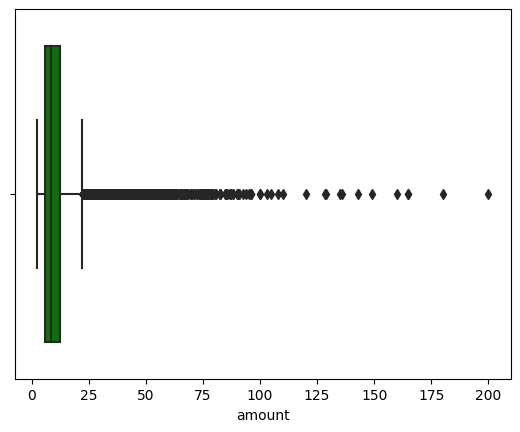

In [42]:
sns.boxplot(data=mydf, x="amount", color="green")

**Detecting outliers in dataset**

In [43]:
mydf.describe(percentiles =[0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99])

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,49990.000000,49990.000000,49990.000000,49990.000000,49990.000000,49990.000000
mean,11.366813,-72.509468,39.933598,-72.505803,39.926903,1.667914
std,9.684697,10.394880,6.225469,10.403539,6.012677,1.289250
min,2.500000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
1%,3.300000,-74.014436,0.000000,-74.015120,0.000000,1.000000
2%,3.500000,-74.010456,40.578523,-74.011755,40.569767,1.000000
3%,3.700000,-74.008734,40.645443,-74.009840,40.646891,1.000000
4%,4.000000,-74.007742,40.681107,-74.008284,40.672764,1.000000
5%,4.100000,-74.006816,40.702132,-74.007275,40.686076,1.000000
10%,4.500000,-74.002780,40.717985,-74.002710,40.713277,1.000000


**Calculating the distance travelled using the latitudes and longitudes**

In [44]:
mydf["x1"]=mydf["latitude_of_pickup"]
mydf["x2"]=mydf["latitude_of_dropoff"]
mydf["y1"]=mydf["longitude_of_pickup"]
mydf["y2"]=mydf["longitude_of_dropoff"]

mydf["distance_travelled"]=np.sqrt((np.square(mydf["x1"]-mydf["x2"]))+(np.square(mydf["y1"]-mydf["y2"])))
mydf["distance_travelled"]

0        0.009436
1        0.079696
2        0.013674
3        0.025340
4        0.019470
           ...   
49995    0.045782
49996    0.008049
49997    0.020574
49998    0.007686
49999    0.000000
Name: distance_travelled, Length: 49990, dtype: float64

In [45]:
#dropping off extra columns
mydf.drop(["latitude_of_pickup", "latitude_of_dropoff", "longitude_of_pickup", "longitude_of_dropoff"], axis=1, inplace=True)
mydf.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,x1,x2,y1,y2,distance_travelled
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,1,40.721319,40.712278,-73.844311,-73.841610,0.009436
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,1,40.711303,40.782004,-74.016048,-73.979268,0.079696
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,2,40.761270,40.750562,-73.982738,-73.991242,0.013674
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,1,40.733143,40.758092,-73.987130,-73.991567,0.025340
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,1,40.768008,40.783762,-73.968095,-73.956655,0.019470


In [46]:
#splitting the date_time_of_pickup in separate columns
mydf[["date", "time", "zone"]]=mydf["date_time_of_pickup"].str.split(pat=" ", n=-1, expand=True)  #a function of pandas to split the string type content in columns based on pattern as delimiter
mydf.head(10)

,unique_id,amount,date_time_of_pickup,no_of_passenger,x1,x2,y1,y2,distance_travelled,date,time,zone
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,1,40.721319,40.712278,-73.844311,-73.841610,0.009436,2009-06-15,17:26:21,UTC
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,1,40.711303,40.782004,-74.016048,-73.979268,0.079696,2010-01-05,16:52:16,UTC
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,2,40.761270,40.750562,-73.982738,-73.991242,0.013674,2011-08-18,00:35:00,UTC
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,1,40.733143,40.758092,-73.987130,-73.991567,0.025340,2012-04-21,04:30:42,UTC
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,1,40.768008,40.783762,-73.968095,-73.956655,0.019470,2010-03-09,07:51:00,UTC
5,50:45.0,12.1,2011-01-06 09:50:45 UTC,1,40.731630,40.758233,-74.000964,-73.972892,0.038675,2011-01-06,09:50:45,UTC
6,35:00.0,7.5,2012-11-20 20:35:00 UTC,1,40.751662,40.764842,-73.980002,-73.973802,0.014565,2012-11-20,20:35:00,UTC
7,22:00.0,16.5,2012-01-04 17:22:00 UTC,1,40.774138,40.751048,-73.951300,-73.990095,0.045146,2012-01-04,17:22:00,UTC
8,10:00.0,9.0,2012-12-03 13:10:00 UTC,1,40.726713,40.731628,-74.006462,-73.993078,0.014258,2012-12-03,13:10:00,UTC
9,11:00.0,8.9,2009-09-02 01:11:00 UTC,2,40.733873,40.758138,-73.980658,-73.991540,0.026593,2009-09-02,01:11:00,UTC


In [47]:
mydf.describe()

,amount,no_of_passenger,x1,x2,y1,y2,distance_travelled
count,49990.000000,49990.000000,49990.000000,49990.000000,49990.000000,49990.000000,49990.000000
mean,11.366813,1.667914,39.933598,39.926903,-72.509468,-72.505803,0.189575
std,9.684697,1.289250,6.225469,6.012677,10.394880,10.403539,3.838982
min,2.500000,0.000000,-74.006893,-74.006377,-75.423848,-84.654241,0.000000
25%,6.000000,1.000000,40.734883,40.734375,-73.992062,-73.991152,0.012475
50%,8.500000,1.000000,40.752679,40.753373,-73.981840,-73.980082,0.021502
75%,12.500000,2.000000,40.767360,40.768166,-73.967155,-73.963588,0.038681
max,200.000000,6.000000,401.083332,43.415190,40.783472,40.851027,360.304405


In [48]:
mydf["distance_travelled"].describe(percentiles=[0.01, .02, .03, .04, .05, .1, .2, .25, .50, .75, .80, .90, .95, .96, .97, .98, .99])

count    49990.000000
mean         0.189575
std          3.838982
min          0.000000
1%           0.000000
2%           0.000000
3%           0.000019
4%           0.002763
5%           0.004374
10%          0.007360
20%          0.010889
25%          0.012475
50%          0.021502
75%          0.038681
80%          0.045295
90%          0.070274
95%          0.112406
96%          0.122447
97%          0.142256
98%          0.195029
99%          0.228219
max        360.304405
Name: distance_travelled, dtype: float64

In [49]:
amt_99= mydf["amount"].quantile(0.99)
dist_99= mydf["distance_travelled"].quantile(0.99)

In [50]:
#replacing too high values, i.e. treating the outliers

mydf["amount"]=np.where(mydf["amount"]>=amt_99, amt_99, mydf["amount"])
mydf["distance_travelled"]=np.where(mydf["distance_travelled"]>=amt_99, amt_99, mydf["distance_travelled"])


mydf["no_of_passenger"]=np.where(mydf["no_of_passenger"]>=5, 4, mydf["no_of_passenger"])  # a taxi having more than 4 passengers seems ambiguous

In [51]:
mydf.head(10)

,unique_id,amount,date_time_of_pickup,no_of_passenger,x1,x2,y1,y2,distance_travelled,date,time,zone
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,1,40.721319,40.712278,-73.844311,-73.841610,0.009436,2009-06-15,17:26:21,UTC
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,1,40.711303,40.782004,-74.016048,-73.979268,0.079696,2010-01-05,16:52:16,UTC
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,2,40.761270,40.750562,-73.982738,-73.991242,0.013674,2011-08-18,00:35:00,UTC
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,1,40.733143,40.758092,-73.987130,-73.991567,0.025340,2012-04-21,04:30:42,UTC
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,1,40.768008,40.783762,-73.968095,-73.956655,0.019470,2010-03-09,07:51:00,UTC
5,50:45.0,12.1,2011-01-06 09:50:45 UTC,1,40.731630,40.758233,-74.000964,-73.972892,0.038675,2011-01-06,09:50:45,UTC
6,35:00.0,7.5,2012-11-20 20:35:00 UTC,1,40.751662,40.764842,-73.980002,-73.973802,0.014565,2012-11-20,20:35:00,UTC
7,22:00.0,16.5,2012-01-04 17:22:00 UTC,1,40.774138,40.751048,-73.951300,-73.990095,0.045146,2012-01-04,17:22:00,UTC
8,10:00.0,9.0,2012-12-03 13:10:00 UTC,1,40.726713,40.731628,-74.006462,-73.993078,0.014258,2012-12-03,13:10:00,UTC
9,11:00.0,8.9,2009-09-02 01:11:00 UTC,2,40.733873,40.758138,-73.980658,-73.991540,0.026593,2009-09-02,01:11:00,UTC


In [52]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49990 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   unique_id            49990 non-null  object 
 1   amount               49990 non-null  float64
 2   date_time_of_pickup  49990 non-null  object 
 3   no_of_passenger      49990 non-null  int64  
 4   x1                   49990 non-null  float64
 5   x2                   49990 non-null  float64
 6   y1                   49990 non-null  float64
 7   y2                   49990 non-null  float64
 8   distance_travelled   49990 non-null  float64
 9   date                 49990 non-null  object 
 10  time                 49990 non-null  object 
 11  zone                 49990 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 5.0+ MB


In [53]:
#converting the type object to datetime object

mydf["date"]=pd.to_datetime(mydf["date"])
mydf["date_time_of_pickup"]=pd.to_datetime(mydf["date_time_of_pickup"])

**Feature Engineering**

In [54]:
#taking some features of datetime object (date_time_of_pickup) for further use

mydf["hour"]=mydf["date_time_of_pickup"].dt.hour
mydf["minute"]=mydf["date_time_of_pickup"].dt.minute
mydf["second"]=mydf["date_time_of_pickup"].dt.second
mydf["year"]=mydf["date_time_of_pickup"].dt.year
mydf["day_of_the_month"]=mydf["date_time_of_pickup"].dt.day
mydf["day"]=mydf["date_time_of_pickup"].dt.day_name()
mydf["day_no"]=mydf["date_time_of_pickup"].dt.weekday

In [55]:
mydf.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,x1,x2,y1,y2,distance_travelled,date,time,zone,hour,minute,second,year,day_of_the_month,day,day_no
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,40.721319,40.712278,-73.844311,-73.841610,0.009436,2009-06-15,17:26:21,UTC,17,26,21,2009,15,Monday,0
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,40.711303,40.782004,-74.016048,-73.979268,0.079696,2010-01-05,16:52:16,UTC,16,52,16,2010,5,Tuesday,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,40.761270,40.750562,-73.982738,-73.991242,0.013674,2011-08-18,00:35:00,UTC,0,35,0,2011,18,Thursday,3
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,40.733143,40.758092,-73.987130,-73.991567,0.025340,2012-04-21,04:30:42,UTC,4,30,42,2012,21,Saturday,5
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,40.768008,40.783762,-73.968095,-73.956655,0.019470,2010-03-09,07:51:00,UTC,7,51,0,2010,9,Tuesday,1


In [56]:
def time_of_day(x):
  if x in range(6,12):
    return "Morning"
  elif x in range(12,17):
    return "Afternoon"
  elif x in range(17,21):
    return "Evening"
  else:
    return "Night"

In [57]:
mydf["time_of_the_day"]=mydf["hour"].apply(time_of_day)
mydf.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,x1,x2,y1,y2,distance_travelled,date,time,zone,hour,minute,second,year,day_of_the_month,day,day_no,time_of_the_day
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,40.721319,40.712278,-73.844311,-73.841610,0.009436,2009-06-15,17:26:21,UTC,17,26,21,2009,15,Monday,0,Evening
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,40.711303,40.782004,-74.016048,-73.979268,0.079696,2010-01-05,16:52:16,UTC,16,52,16,2010,5,Tuesday,1,Afternoon
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,40.761270,40.750562,-73.982738,-73.991242,0.013674,2011-08-18,00:35:00,UTC,0,35,0,2011,18,Thursday,3,Night
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,40.733143,40.758092,-73.987130,-73.991567,0.025340,2012-04-21,04:30:42,UTC,4,30,42,2012,21,Saturday,5,Night
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,40.768008,40.783762,-73.968095,-73.956655,0.019470,2010-03-09,07:51:00,UTC,7,51,0,2010,9,Tuesday,1,Morning


In [58]:
#removing the outliers of latitude and longitude
mydf = mydf.loc[mydf["x1"].between(40,42)]
mydf = mydf.loc[mydf["x2"].between(40,42)]
mydf = mydf.loc[mydf["y1"].between(-75, -72)]
mydf = mydf.loc[mydf["y2"].between(-75, -72)]
print("Number of observations are: ", mydf.shape[0])

Number of observations are:  48944


In [59]:
def minkowski_distance(x1, x2, y1, y2, p):
  return (((abs(x1-x2))**p)+((abs(y1-y2))**p))**(1/p)

**Calculating Manhattan distance using minkowski distance (a general formula for calculating any distance in multi-dimensional space)**

In [60]:
mydf["manhattan_dist"]=minkowski_distance(mydf["x1"], mydf["x2"], mydf["y1"], mydf["y2"], 1 )
mydf.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,x1,x2,y1,y2,distance_travelled,date,...,zone,hour,minute,second,year,day_of_the_month,day,day_no,time_of_the_day,manhattan_dist
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,40.721319,40.712278,-73.844311,-73.841610,0.009436,2009-06-15,...,UTC,17,26,21,2009,15,Monday,0,Evening,0.011742
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,40.711303,40.782004,-74.016048,-73.979268,0.079696,2010-01-05,...,UTC,16,52,16,2010,5,Tuesday,1,Afternoon,0.107481
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,40.761270,40.750562,-73.982738,-73.991242,0.013674,2011-08-18,...,UTC,0,35,0,2011,18,Thursday,3,Night,0.019212
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,40.733143,40.758092,-73.987130,-73.991567,0.025340,2012-04-21,...,UTC,4,30,42,2012,21,Saturday,5,Night,0.029386
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,40.768008,40.783762,-73.968095,-73.956655,0.019470,2010-03-09,...,UTC,7,51,0,2010,9,Tuesday,1,Morning,0.027194


**Exploratory Data Analysis**

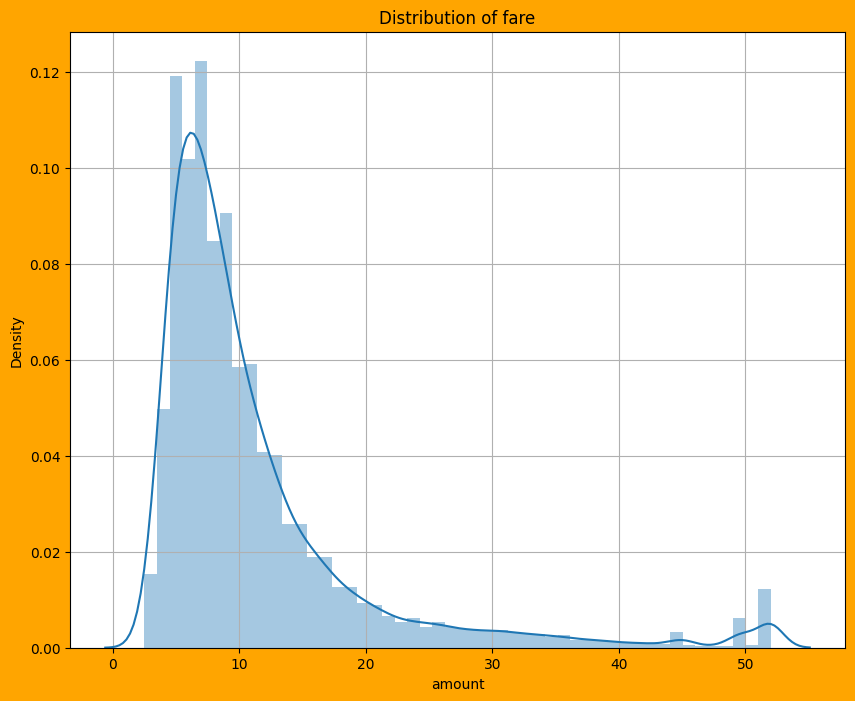

In [61]:
plt.figure(figsize=(10,8), facecolor="orange")
sns.distplot(mydf["amount"]);
plt.title("Distribution of fare")
plt.grid()

#plt.savefig("Distribution of fare.jpg")

By this, as the distribution is skewed, we can say that individuals prefer not to use taxi for long distances because long distances makes high fare.

In [62]:
pvt_table1= mydf.pivot_table(index="hour", columns="year", values="amount", aggfunc="mean")
pvt_table1

year,2009,2010,2011,2012,2013,2014,2015
hour,,,,,,,
0,10.678237,10.121852,10.915584,11.478135,12.148226,14.608251,15.289630
1,10.275422,10.288832,10.638158,12.199597,13.024562,12.030086,13.037660
2,9.840268,9.470056,9.548521,11.545342,12.980162,12.839934,12.097746
3,10.136232,10.726230,10.589063,11.645033,12.169224,14.546777,13.224000
4,12.457700,13.559684,13.739362,13.183133,14.231809,13.722024,15.000667
5,10.614853,13.714394,13.147191,16.088506,17.725429,18.025904,16.122424
6,11.429930,12.329623,10.714620,10.332278,14.648882,14.061630,12.165395
7,9.445274,8.854509,10.825000,10.845704,12.398034,12.673885,12.713262
8,9.987515,9.436103,9.895224,10.368153,10.857440,11.927181,12.648141


Text(0, 0.5, 'Fare in $USD / mile')

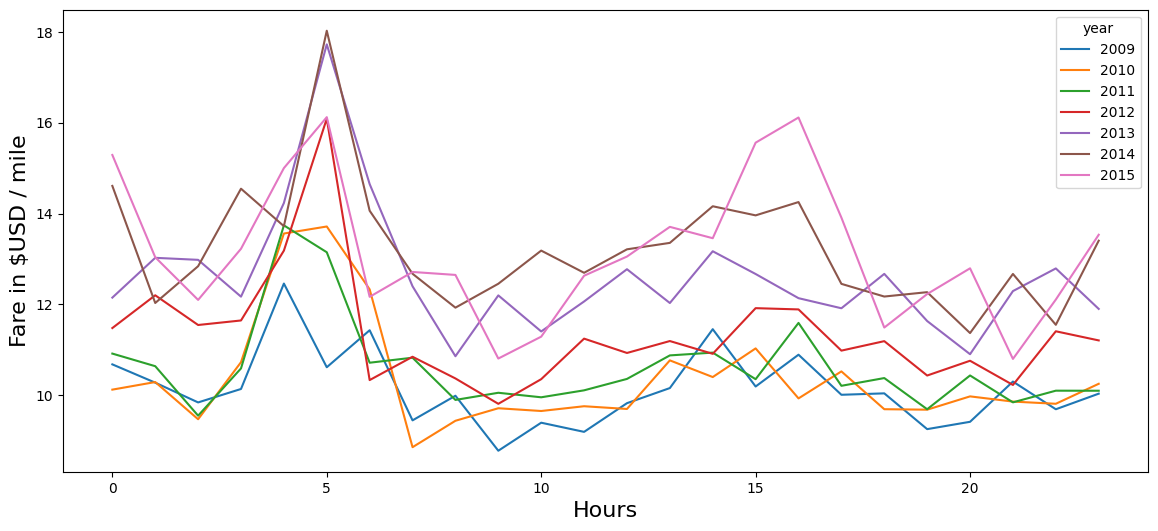

In [63]:
pvt_table1.plot(figsize=(14,6))
plt.xlabel("Hours", fontsize=16)
plt.ylabel("Fare in $USD / mile", fontsize=16)

Text(0, 0.5, 'Fare in $USD / mile')

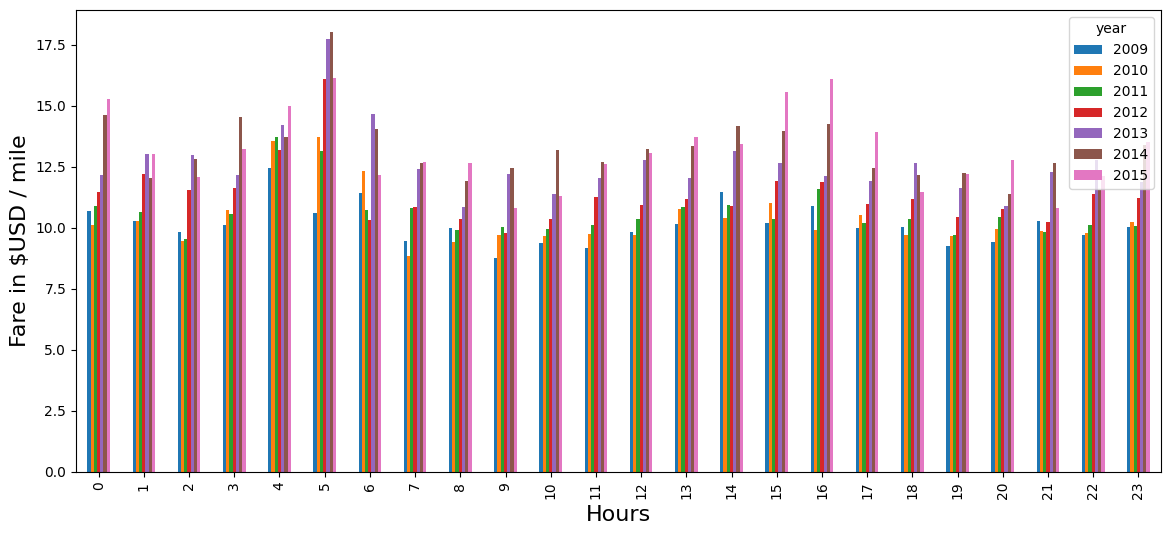

In [64]:
pvt_table1.plot(figsize=(14,6), kind="bar")
plt.xlabel("Hours", fontsize=16)
plt.ylabel("Fare in $USD / mile", fontsize=16)

The graph displays the link between fare/mile and hour for different years. From the graph we can say that there is a spike in travel via taxi between 5-7 am which can be due to business hours start time.

In [65]:
mydf.head(10)

,unique_id,amount,date_time_of_pickup,no_of_passenger,x1,x2,y1,y2,distance_travelled,date,...,zone,hour,minute,second,year,day_of_the_month,day,day_no,time_of_the_day,manhattan_dist
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,40.721319,40.712278,-73.844311,-73.841610,0.009436,2009-06-15,...,UTC,17,26,21,2009,15,Monday,0,Evening,0.011742
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,40.711303,40.782004,-74.016048,-73.979268,0.079696,2010-01-05,...,UTC,16,52,16,2010,5,Tuesday,1,Afternoon,0.107481
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,40.761270,40.750562,-73.982738,-73.991242,0.013674,2011-08-18,...,UTC,0,35,0,2011,18,Thursday,3,Night,0.019212
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,40.733143,40.758092,-73.987130,-73.991567,0.025340,2012-04-21,...,UTC,4,30,42,2012,21,Saturday,5,Night,0.029386
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,40.768008,40.783762,-73.968095,-73.956655,0.019470,2010-03-09,...,UTC,7,51,0,2010,9,Tuesday,1,Morning,0.027194
5,50:45.0,12.1,2011-01-06 09:50:45+00:00,1,40.731630,40.758233,-74.000964,-73.972892,0.038675,2011-01-06,...,UTC,9,50,45,2011,6,Thursday,3,Morning,0.054675
6,35:00.0,7.5,2012-11-20 20:35:00+00:00,1,40.751662,40.764842,-73.980002,-73.973802,0.014565,2012-11-20,...,UTC,20,35,0,2012,20,Tuesday,1,Evening,0.019380
7,22:00.0,16.5,2012-01-04 17:22:00+00:00,1,40.774138,40.751048,-73.951300,-73.990095,0.045146,2012-01-04,...,UTC,17,22,0,2012,4,Wednesday,2,Evening,0.061885
8,10:00.0,9.0,2012-12-03 13:10:00+00:00,1,40.726713,40.731628,-74.006462,-73.993078,0.014258,2012-12-03,...,UTC,13,10,0,2012,3,Monday,0,Afternoon,0.018299
9,11:00.0,8.9,2009-09-02 01:11:00+00:00,2,40.733873,40.758138,-73.980658,-73.991540,0.026593,2009-09-02,...,UTC,1,11,0,2009,2,Wednesday,2,Night,0.035147


In [66]:
grouped_tod = mydf.groupby(mydf["time_of_the_day"]).agg({"amount":["mean"]})
grouped_tod

,amount
,mean
time_of_the_day,
Afternoon,11.729643
Evening,10.865916
Morning,10.858767
Night,11.494612


Text(0, 0.5, 'Average fare')

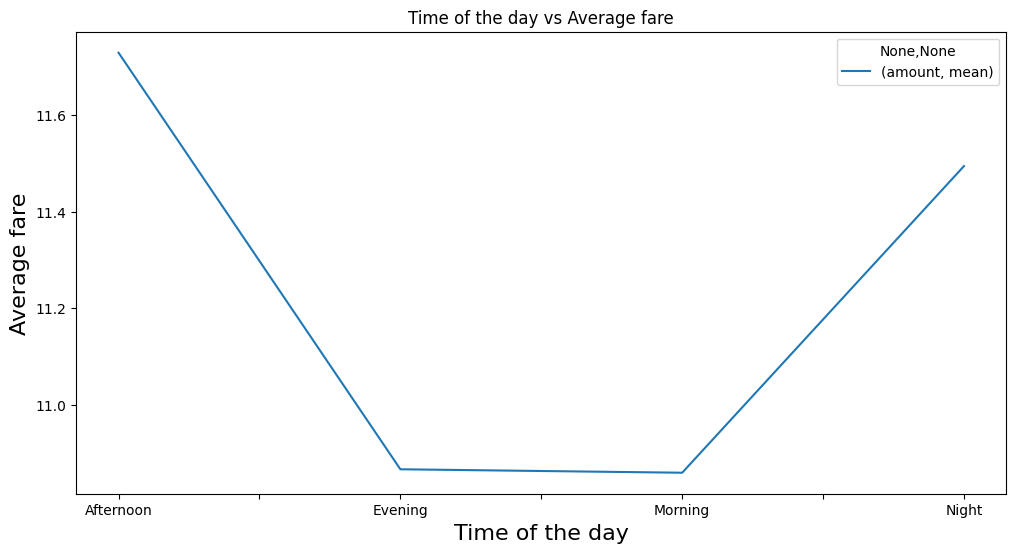

In [67]:
grouped_tod.plot(figsize=(12,6));
plt.title("Time of the day vs Average fare")
plt.xlabel("Time of the day", fontsize=16)
plt.ylabel("Average fare", fontsize=16)

**Above we divided the  24 hours in 4 parts:**

`Morning: 6 a.m. to 12 p.m.`

`Afternoon: 12 p.m. to 5 p.m.`

`Evening: 4 p.m. to 9 p.m.`

`Night: 9 p.m. to 6 a.m.`

From the graph, we can say that in comparison to other times, the fare is significantly higher in the afternoon and at night. This increase could be related to the unusual hours, as most cab firms impose a night premium so that drivers don't cancel rides and lose out on the odd hour incentives.

In [68]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mydf['day'] = pd.Categorical(mydf['day'], categories=day_order, ordered=True)  #ordering the days so that we get days sorted in chart

grouped_day = mydf.groupby(mydf["day"]).agg({"amount":["mean"]})
grouped_day

,amount
,mean
day,
Monday,11.454932
Tuesday,11.098784
Wednesday,10.984002
Thursday,11.509171
Friday,11.262035
Saturday,11.050456
Sunday,11.425765


Text(0, 0.5, 'Average fare')

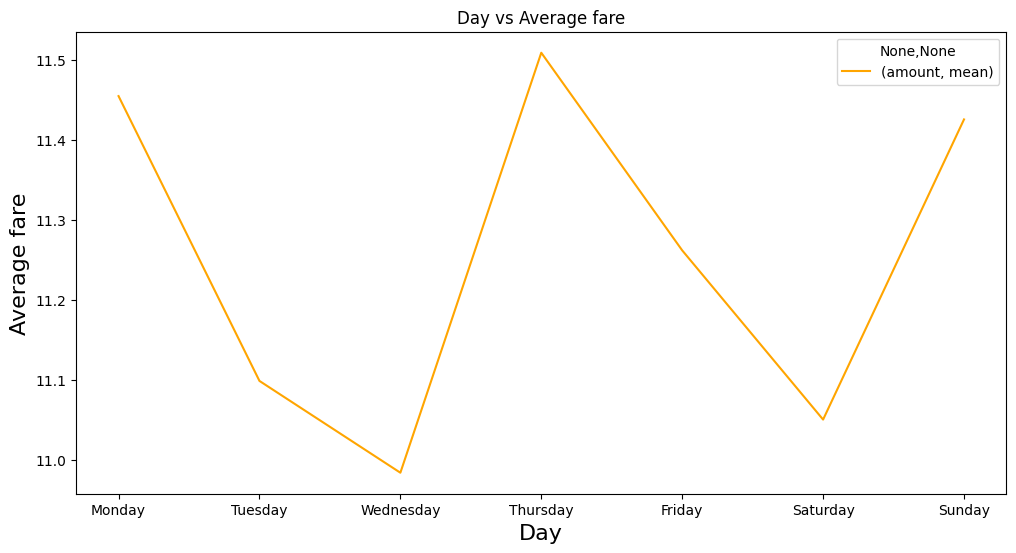

In [69]:
grouped_day.plot(figsize=(12,6), color="orange");
plt.title("Day vs Average fare")
plt.xlabel("Day", fontsize=16)
plt.ylabel("Average fare", fontsize=16)


From the graph we can say that there is some unusual pattern because average fare should be lower on weekends than weekdays but there is increase in average fare on sundsy, may be thats because many people prefer to have intercity travels on sundays with family or friends.

In [70]:
pvt_table2=mydf.pivot_table(index="time_of_the_day", columns="day", values = "no_of_passenger", aggfunc="count")
pvt_table2

day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
time_of_the_day,,,,,,,
Afternoon,1620,1671,1602,1631,1668,1758,1631
Evening,1633,1650,1698,1729,1727,1602,1243
Morning,1753,1894,1996,1982,1908,1288,1074
Night,1494,1551,1751,1932,2199,2832,2427


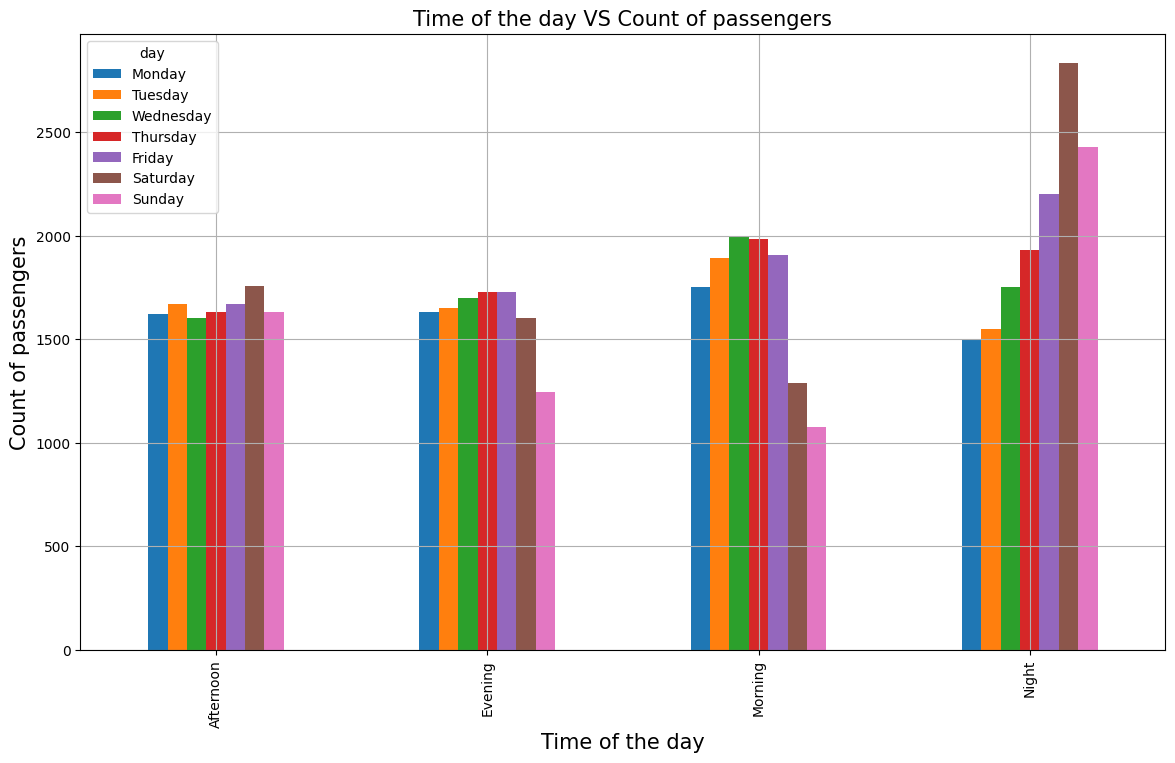

In [71]:
pvt_table2.plot(figsize=(14,8), kind="bar")
plt.title("Time of the day VS Count of passengers", fontsize=15)
plt.xlabel("Time of the day", fontsize=15)
plt.ylabel("Count of passengers", fontsize=15)
plt.grid()

The usual trend is seen from the graph which indicates that less people travel on weekdays in night time when compared to weekends and night time.

In [72]:
pvt_table3=mydf.pivot_table(index="time_of_the_day", columns="day", values="amount", aggfunc="mean")
pvt_table3

day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
time_of_the_day,,,,,,,
Afternoon,11.692278,11.674710,11.801017,11.999957,12.060348,11.272452,11.637204
Evening,10.833399,11.025412,10.418280,11.240220,10.741482,10.668620,11.214916
Morning,11.364740,10.640312,10.524644,10.884566,10.864177,10.708509,11.162086
Night,11.982758,11.116215,11.308738,11.976310,11.410523,11.284163,11.508344


Text(0, 0.5, 'Average fare')

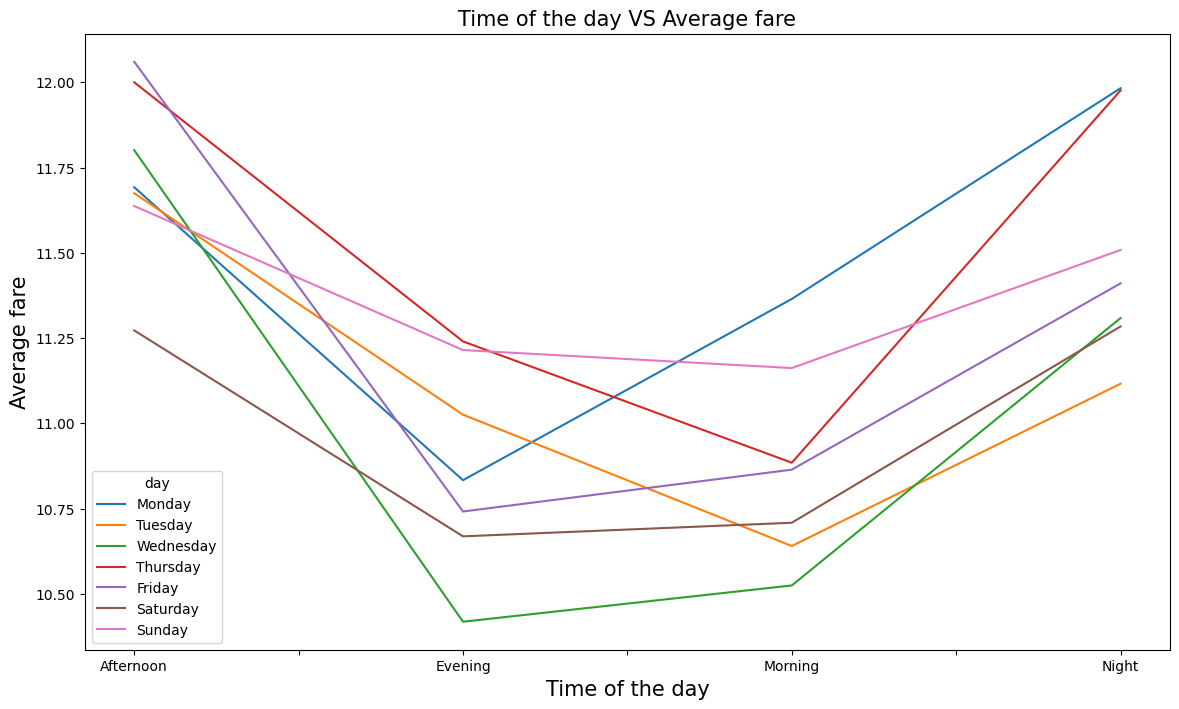

In [73]:
pvt_table3.plot(figsize=(14,8))
plt.title("Time of the day VS Average fare", fontsize=15)
plt.xlabel("Time of the day", fontsize=15)
plt.ylabel("Average fare", fontsize=15)

In [74]:
pvt_table4 = mydf.pivot_table(index="day", values="distance_travelled", aggfunc="mean")
pvt_table4

,distance_travelled
day,
Monday,0.036394
Tuesday,0.033440
Wednesday,0.032542
Thursday,0.034442
Friday,0.033534
Saturday,0.034301
Sunday,0.036637


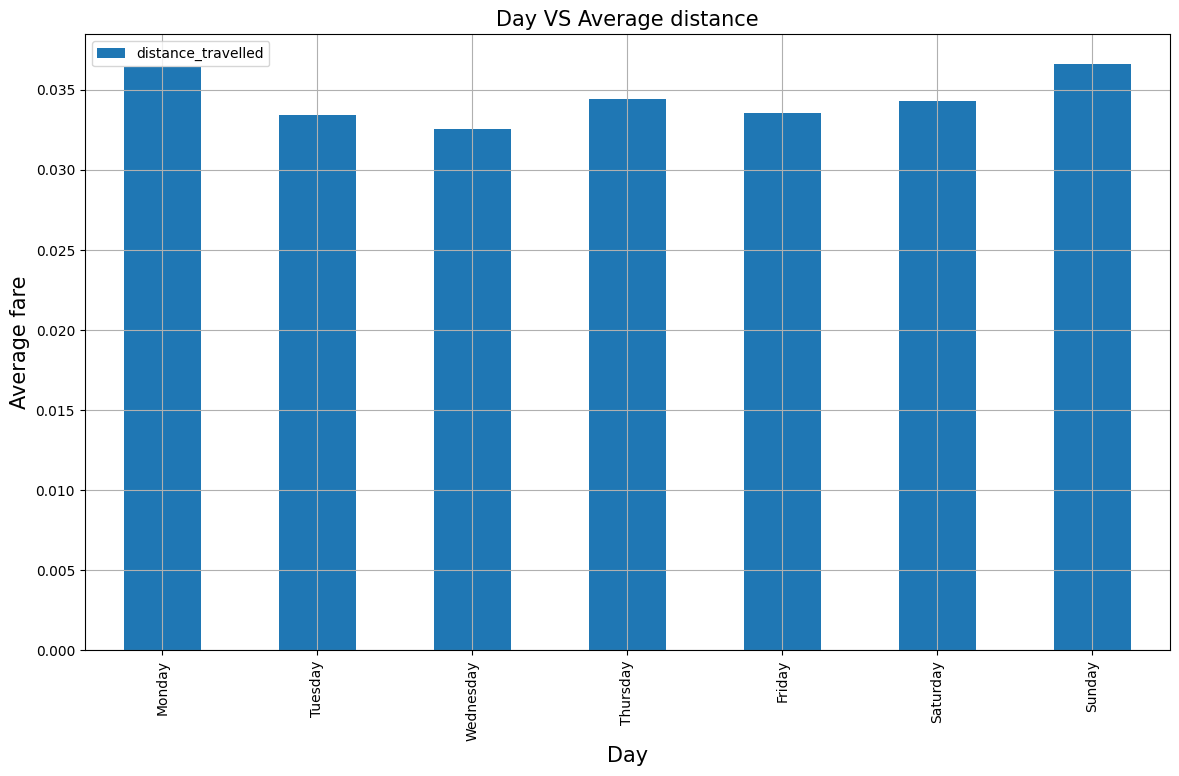

In [75]:
pvt_table4.plot(figsize=(14,8), kind="bar")
plt.title("Day VS Average distance", fontsize=15)
plt.xlabel("Day", fontsize=15)
plt.ylabel("Average fare", fontsize=15)
plt.grid()

In [76]:
pvt_table5 = mydf.pivot_table(index="year", values="no_of_passenger", aggfunc="count")
pvt_table5

,no_of_passenger
year,
2009,7611
2010,7458
2011,7624
2012,7812
2013,7666
2014,7390
2015,3383


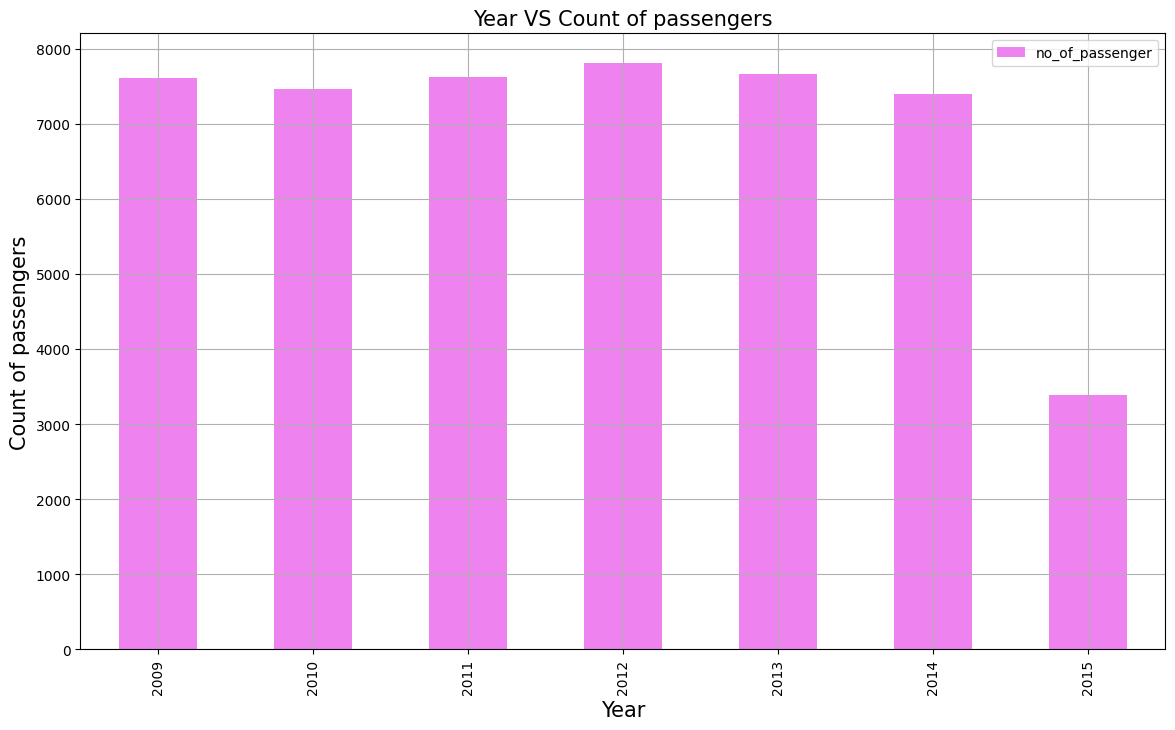

In [77]:
pvt_table5.plot(figsize=(14,8), kind="bar", color="violet")
plt.title("Year VS Count of passengers", fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Count of passengers", fontsize=15)
plt.grid()

In [78]:
pvt_table6 = mydf.pivot_table(index="year", columns="day", values="no_of_passenger", aggfunc="count")
pvt_table6

day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
year,,,,,,,
2009,1032,1042,1099,1162,1179,1138,959
2010,920,1061,1085,1127,1178,1097,990
2011,1042,1053,1138,1104,1185,1168,934
2012,1026,1052,1124,1197,1169,1183,1061
2013,1048,1085,1070,1129,1147,1191,996
2014,984,1016,1061,1078,1121,1137,993
2015,448,457,470,477,523,566,442


Text(0, 0.5, 'No of passengers')

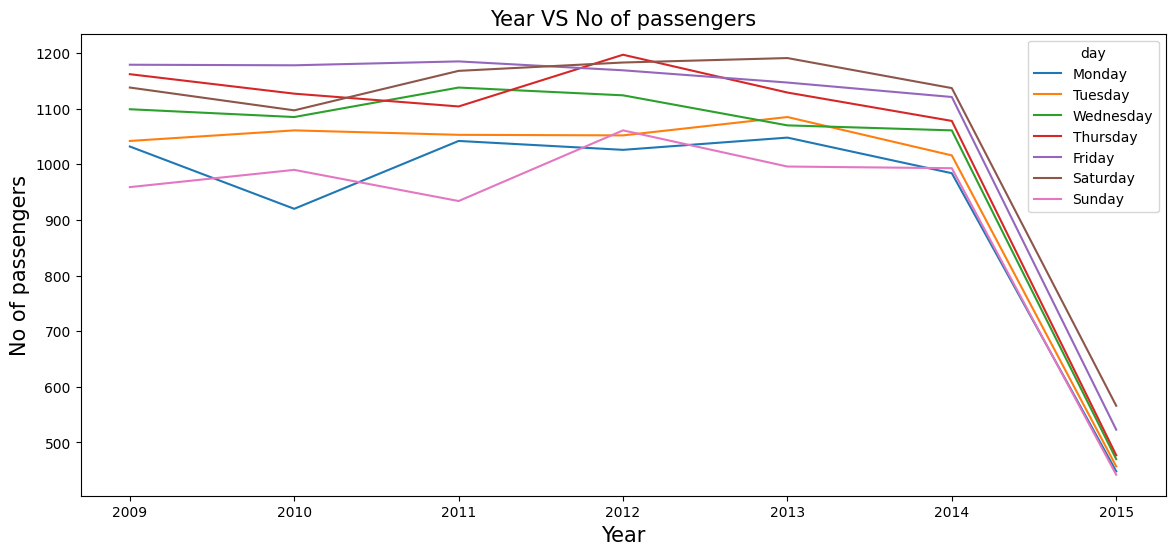

In [79]:
pvt_table6.plot(figsize=(14,6))
plt.title("Year VS No of passengers", fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.ylabel("No of passengers", fontsize=15)

**Preprocessing**

In [80]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48944 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   unique_id            48944 non-null  object             
 1   amount               48944 non-null  float64            
 2   date_time_of_pickup  48944 non-null  datetime64[ns, UTC]
 3   no_of_passenger      48944 non-null  int64              
 4   x1                   48944 non-null  float64            
 5   x2                   48944 non-null  float64            
 6   y1                   48944 non-null  float64            
 7   y2                   48944 non-null  float64            
 8   distance_travelled   48944 non-null  float64            
 9   date                 48944 non-null  datetime64[ns]     
 10  time                 48944 non-null  object             
 11  zone                 48944 non-null  object             
 12  hour              

In [81]:
mydf.select_dtypes(include="O").info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48944 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   unique_id        48944 non-null  object
 1   time             48944 non-null  object
 2   zone             48944 non-null  object
 3   time_of_the_day  48944 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


In [82]:
mydf.drop(columns=["unique_id", "zone", "time", "minute", "second", "date", "date_time_of_pickup", "x1", "x2", "y1", "y2"], inplace=True)
mydf.head()

,amount,no_of_passenger,distance_travelled,hour,year,day_of_the_month,day,day_no,time_of_the_day,manhattan_dist
0,4.5,1,0.009436,17,2009,15,Monday,0,Evening,0.011742
1,16.9,1,0.079696,16,2010,5,Tuesday,1,Afternoon,0.107481
2,5.7,2,0.013674,0,2011,18,Thursday,3,Night,0.019212
3,7.7,1,0.025340,4,2012,21,Saturday,5,Night,0.029386
4,5.3,1,0.019470,7,2010,9,Tuesday,1,Morning,0.027194


In [83]:
# 1: Yes
# 0: No
# Is_Weekend - if day_no between (0,6) : 1
#              else i.e (1 to 5): 0
# Is_starting_of_month - day of month between (1-10)
# Is_middle_of_month - day of month between (11-20)
# Is_end_of_month - day of month between (21-31)

In [84]:
#one hot encoding to categorical columns
df = pd.get_dummies(mydf, columns=["time_of_the_day", "day"])
df

,amount,no_of_passenger,distance_travelled,hour,year,day_of_the_month,day_no,manhattan_dist,time_of_the_day_Afternoon,time_of_the_day_Evening,time_of_the_day_Morning,time_of_the_day_Night,day_Monday,day_Tuesday,day_Wednesday,day_Thursday,day_Friday,day_Saturday,day_Sunday
0,4.5,1,0.009436,17,2009,15,0,0.011742,0,1,0,0,1,0,0,0,0,0,0
1,16.9,1,0.079696,16,2010,5,1,0.107481,1,0,0,0,0,1,0,0,0,0,0
2,5.7,2,0.013674,0,2011,18,3,0.019212,0,0,0,1,0,0,0,1,0,0,0
3,7.7,1,0.025340,4,2012,21,5,0.029386,0,0,0,1,0,0,0,0,0,1,0
4,5.3,1,0.019470,7,2010,9,1,0.027194,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,1,0.045782,23,2013,12,2,0.059464,0,0,0,1,0,0,1,0,0,0,0
49996,7.5,1,0.008049,17,2015,22,0,0.010223,0,1,0,0,1,0,0,0,0,0,0
49997,6.9,1,0.020574,4,2011,30,6,0.024645,0,0,0,1,0,0,0,0,0,0,1
49998,4.5,2,0.007686,7,2012,6,1,0.009508,0,0,1,0,0,1,0,0,0,0,0


In [85]:
df["Is_Weekend"] =np.where(df["day_no"].isin ([0,6]),1,0)
df["Is_starting_of_month"] = np.where(df["day_of_the_month"].isin ([1,2,3,4,5,6,7,8,9,10]),1,0)
df["Is_middle_of_month"] = np.where(df["day_of_the_month"].isin (range(11,21)),1,0)
df["Is_end_of_month"] = np.where(df["day_of_the_month"].isin (range(21,32)),1,0)
df["Is_leap_year"] = np.where((df["year"]%4 == 0),1,0)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48944 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   amount                     48944 non-null  float64
 1   no_of_passenger            48944 non-null  int64  
 2   distance_travelled         48944 non-null  float64
 3   hour                       48944 non-null  int64  
 4   year                       48944 non-null  int64  
 5   day_of_the_month           48944 non-null  int64  
 6   day_no                     48944 non-null  int64  
 7   manhattan_dist             48944 non-null  float64
 8   time_of_the_day_Afternoon  48944 non-null  uint8  
 9   time_of_the_day_Evening    48944 non-null  uint8  
 10  time_of_the_day_Morning    48944 non-null  uint8  
 11  time_of_the_day_Night      48944 non-null  uint8  
 12  day_Monday                 48944 non-null  uint8  
 13  day_Tuesday                48944 non-null  uin

**Applying the model**

In [87]:
y = df["amount"]
X = df.drop(columns=["amount"])

In [88]:
cor_data = X.corr()
cor_data.style.background_gradient(cmap="coolwarm")

,no_of_passenger,distance_travelled,hour,year,day_of_the_month,day_no,manhattan_dist,time_of_the_day_Afternoon,time_of_the_day_Evening,time_of_the_day_Morning,time_of_the_day_Night,day_Monday,day_Tuesday,day_Wednesday,day_Thursday,day_Friday,day_Saturday,day_Sunday,Is_Weekend,Is_starting_of_month,Is_middle_of_month,Is_end_of_month,Is_leap_year
no_of_passenger,1.000000,0.013712,0.013628,-0.006069,0.006858,0.048013,0.013451,-0.006126,0.015378,-0.049548,0.038305,-0.013072,-0.022525,-0.014359,-0.023507,0.004191,0.038293,0.030675,0.013374,-0.005853,-0.002992,0.008815,-0.002681
distance_travelled,0.013712,1.000000,-0.032640,0.017318,-0.000244,0.005474,0.993679,-0.005240,-0.028527,-0.026682,0.056615,0.018457,-0.009299,-0.018298,0.000276,-0.008927,-0.001143,0.020497,0.029895,-0.001435,0.003420,-0.002004,0.000105
hour,0.013628,-0.032640,1.000000,0.005022,-0.007159,-0.091323,-0.031199,0.037338,0.426330,-0.405137,-0.047724,0.028591,0.035515,0.025279,0.027309,0.006408,-0.028032,-0.097366,-0.052394,0.005809,-0.001271,-0.004495,-0.002412
year,-0.006069,0.017318,0.005022,1.000000,-0.011311,0.006056,0.016878,-0.010090,-0.001731,0.002923,0.008295,0.002549,-0.001478,-0.005092,-0.007050,-0.004908,0.010345,0.005902,0.006476,0.007664,0.002955,-0.010577,0.060997
day_of_the_month,0.006858,-0.000244,-0.007159,-0.011311,1.000000,0.007631,0.000328,0.010268,-0.010280,-0.001329,0.001180,-0.000912,-0.002896,-0.004537,-0.008262,0.005378,0.009001,0.001974,0.000806,-0.808469,-0.014775,0.817916,-0.003540
day_no,0.048013,0.005474,-0.091323,0.006056,0.007631,1.000000,0.006493,-0.002059,-0.039290,-0.090168,0.123646,-0.606201,-0.415721,-0.216072,-0.006579,0.210759,0.427476,0.587274,-0.018303,-0.007816,0.004322,0.003429,0.004884
manhattan_dist,0.013451,0.993679,-0.031199,0.016878,0.000328,0.006493,1.000000,-0.004535,-0.026980,-0.025346,0.053256,0.017466,-0.009647,-0.018205,0.000306,-0.008657,-0.000400,0.020642,0.029242,-0.002388,0.003850,-0.001489,-0.000411
time_of_the_day_Afternoon,-0.006126,-0.005240,0.037338,-0.010090,0.010268,-0.002059,-0.004535,1.000000,-0.304715,-0.315461,-0.355676,0.011614,0.009756,-0.008961,-0.012184,-0.014292,-0.001590,0.017506,0.022334,-0.003855,-0.008329,0.012183,-0.007935
time_of_the_day_Evening,0.015378,-0.028527,0.426330,-0.001731,-0.010280,-0.039290,-0.026980,-0.304715,1.000000,-0.310124,-0.349658,0.019255,0.012703,0.010171,0.007130,-0.000306,-0.016476,-0.032645,-0.010114,0.007754,0.002288,-0.009998,-0.000229
time_of_the_day_Morning,-0.049548,-0.026682,-0.405137,0.002923,-0.001329,-0.090168,-0.025346,-0.315461,-0.310124,1.000000,-0.361990,0.024324,0.034454,0.038446,0.028682,0.011209,-0.070150,-0.067273,-0.032679,-0.001018,0.006096,-0.005102,-0.000595


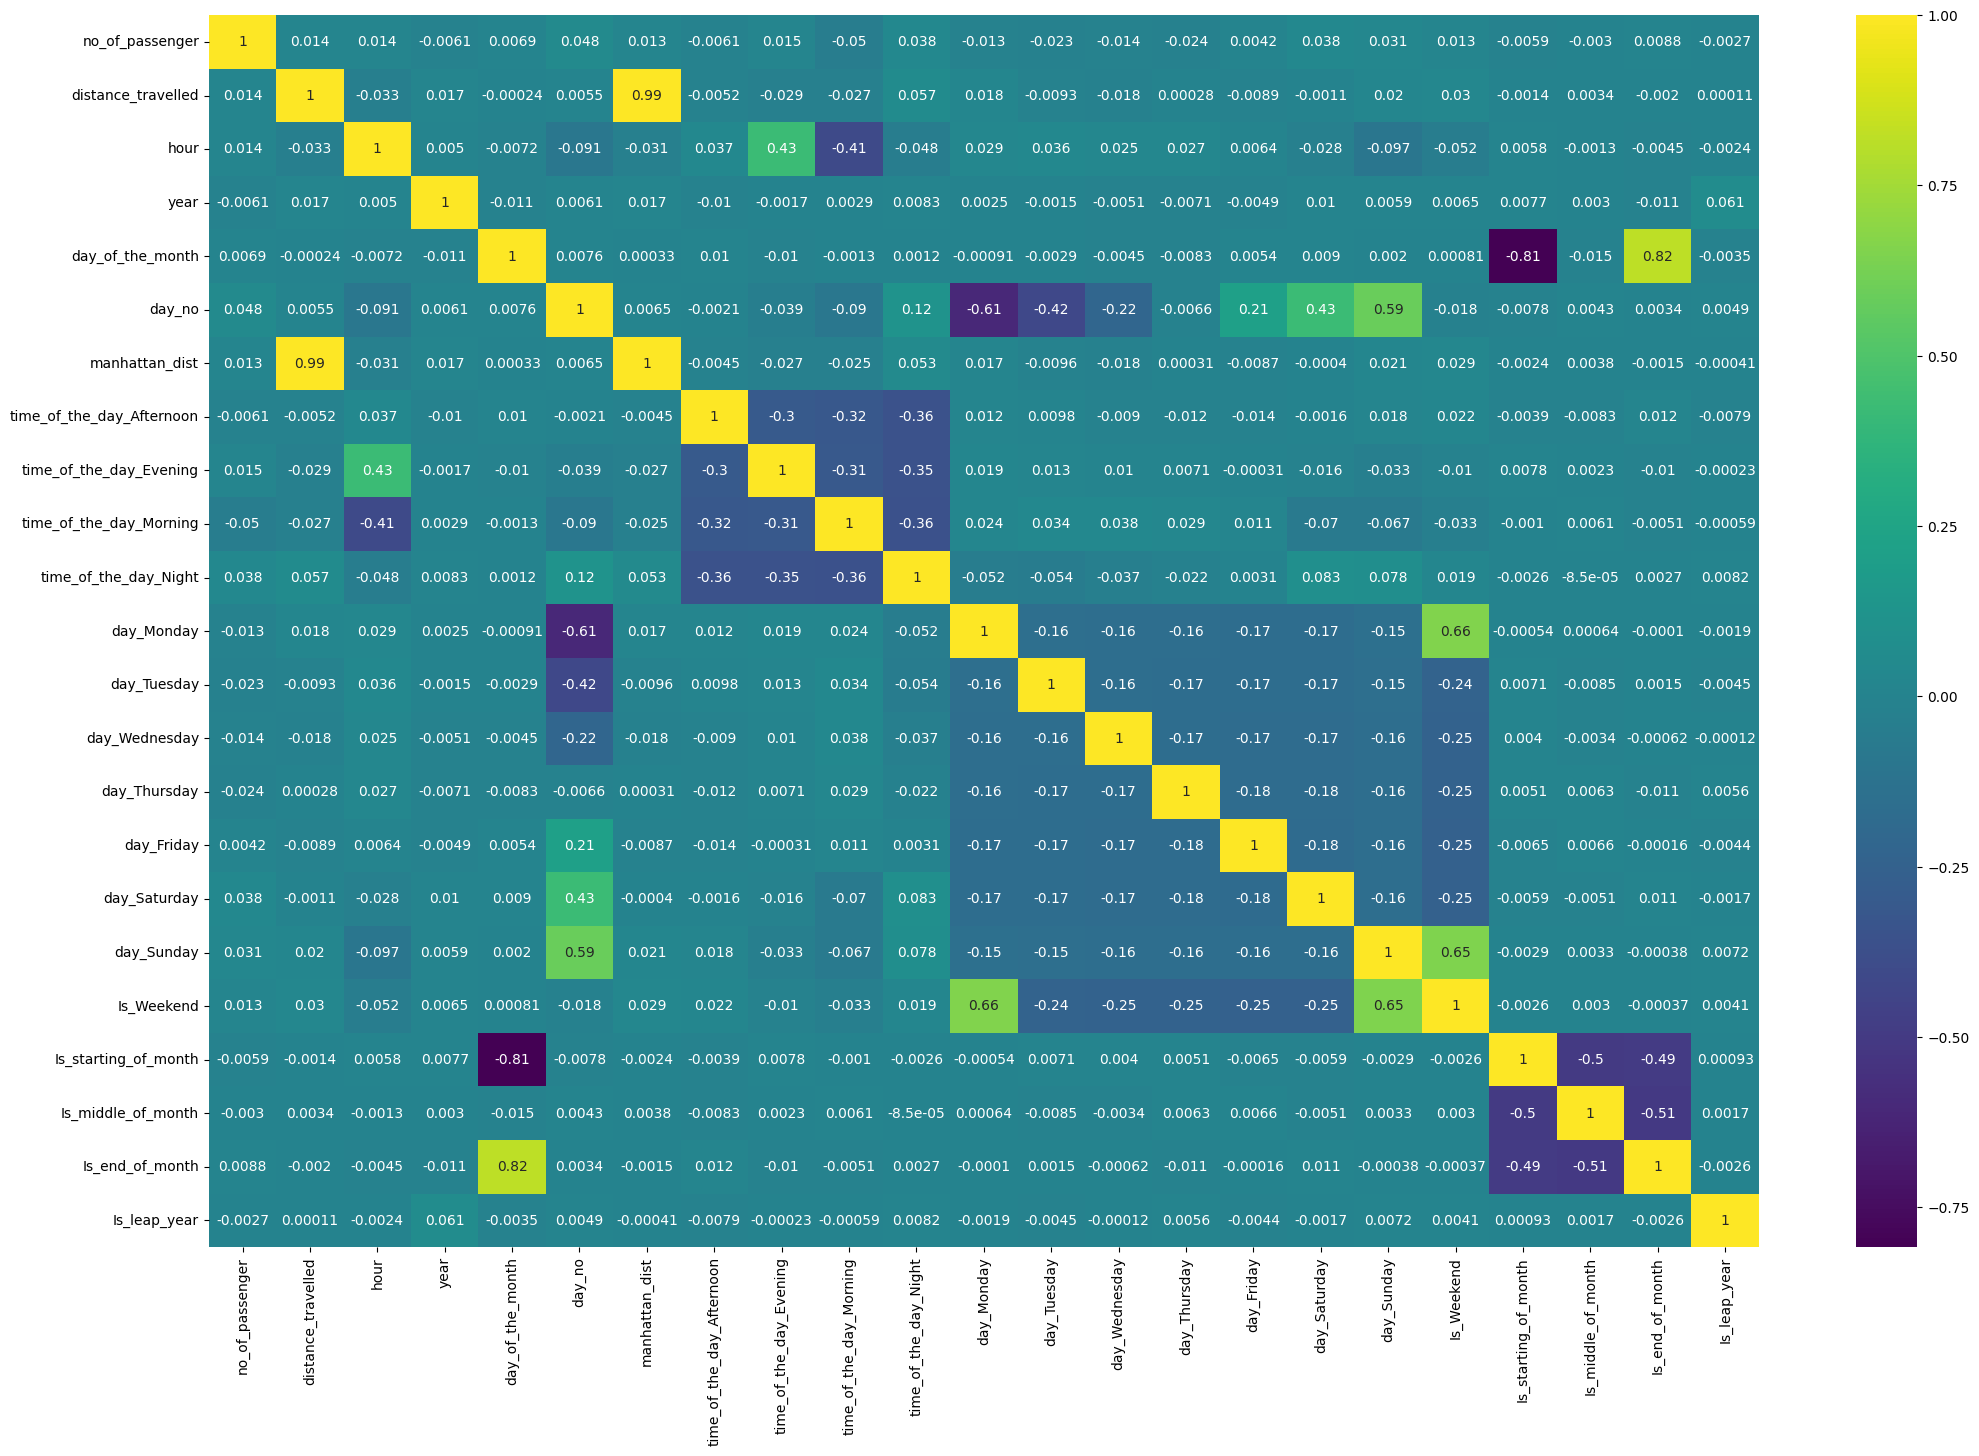

In [89]:
plt.figure(figsize=(25,16))
sns.heatmap(cor_data, annot=True, cmap="viridis")
plt.show()

In [90]:
#Splitting the dataset into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39155 entries, 20390 to 16145
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   no_of_passenger            39155 non-null  int64  
 1   distance_travelled         39155 non-null  float64
 2   hour                       39155 non-null  int64  
 3   year                       39155 non-null  int64  
 4   day_of_the_month           39155 non-null  int64  
 5   day_no                     39155 non-null  int64  
 6   manhattan_dist             39155 non-null  float64
 7   time_of_the_day_Afternoon  39155 non-null  uint8  
 8   time_of_the_day_Evening    39155 non-null  uint8  
 9   time_of_the_day_Morning    39155 non-null  uint8  
 10  time_of_the_day_Night      39155 non-null  uint8  
 11  day_Monday                 39155 non-null  uint8  
 12  day_Tuesday                39155 non-null  uint8  
 13  day_Wednesday              39155 non-null 

In [92]:
X_train_matrix = X_train.describe().T
X_train_matrix

,count,mean,std,min,25%,50%,75%,max
no_of_passenger,39155.0,1.562278,0.999858,0.0,1.00000,1.000000,2.000000,4.000000
distance_travelled,39155.0,0.034412,0.042422,0.0,0.01288,0.021827,0.038877,1.097516
hour,39155.0,13.469468,6.498286,0.0,9.00000,14.000000,19.000000,23.000000
year,39155.0,2011.745754,1.868978,2009.0,2010.00000,2012.000000,2013.000000,2015.000000
day_of_the_month,39155.0,15.660580,8.657341,1.0,8.00000,16.000000,23.000000,31.000000
day_no,39155.0,3.034044,1.956580,0.0,1.00000,3.000000,5.000000,6.000000
manhattan_dist,39155.0,0.044539,0.055793,0.0,0.01650,0.028094,0.051157,1.537858
time_of_the_day_Afternoon,39155.0,0.237645,0.425646,0.0,0.00000,0.000000,0.000000,1.000000
time_of_the_day_Evening,39155.0,0.229473,0.420499,0.0,0.00000,0.000000,0.000000,1.000000
time_of_the_day_Morning,39155.0,0.243698,0.429318,0.0,0.00000,0.000000,0.000000,1.000000


In [93]:
X_test_matrix = X_test.describe().T
X_test_matrix

,count,mean,std,min,25%,50%,75%,max
no_of_passenger,9789.0,1.552968,0.990958,0.0,1.000000,1.000000,2.000000,4.000000
distance_travelled,9789.0,0.034422,0.040100,0.0,0.012842,0.021898,0.039781,0.940726
hour,9789.0,13.540300,6.523975,0.0,9.000000,14.000000,19.000000,23.000000
year,9789.0,2011.711615,1.850427,2009.0,2010.000000,2012.000000,2013.000000,2015.000000
day_of_the_month,9789.0,15.674022,8.670622,1.0,8.000000,16.000000,23.000000,31.000000
day_no,9789.0,3.017877,1.956564,0.0,1.000000,3.000000,5.000000,6.000000
manhattan_dist,9789.0,0.044445,0.052265,0.0,0.016393,0.028193,0.051895,1.323713
time_of_the_day_Afternoon,9789.0,0.232506,0.422451,0.0,0.000000,0.000000,0.000000,1.000000
time_of_the_day_Evening,9789.0,0.234651,0.423802,0.0,0.000000,0.000000,0.000000,1.000000
time_of_the_day_Morning,9789.0,0.240372,0.427331,0.0,0.000000,0.000000,0.000000,1.000000


In [94]:
X_train_matrix.to_excel("X_train.xlsx")
X_test_matrix.to_excel("X_test.xlsx")

Using Random Forest Regressor

In [95]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
scre = rfr.score(X_train, y_train)
print("Validation set score:", scre)

Validation set score: 0.9748616792344369


In [96]:
y_pred = rfr.predict(X_test)
r2score = r2_score(y_test, y_pred)
print("R2 Score is:", r2score)

mae = mean_absolute_error(y_test, y_pred)
print("MAE is:", mae)

mse = mean_squared_error(y_test, y_pred)
print("RMSE is:", mse**(1/2))

R2 Score is: 0.8422154364494709
MAE is: 2.0026114618449276
RMSE is: 3.5593611945993655


In [97]:
#using hyperparameter tuning with Grid search CV
param = {
    "n_estimators":[20,50],
    "criterion":["squared_error"],
    "max_depth":[3,5],
    "min_samples_split":[2,4],
    "min_samples_leaf":[2,4]
}

rgr = GridSearchCV(estimator = rfr, cv=5, param_grid=param, verbose=1, n_jobs=-1)
rgr.fit(X_train, y_train)
scre = rgr.score(X_train, y_train)
print("Validation set score:", scre)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Validation set score: 0.8242022202098525


In [98]:
y_pred = rgr.predict(X_test)
r2score = r2_score(y_test, y_pred)
print("R2 Score is:", r2score)

mae = mean_absolute_error(y_test, y_pred)
print("MAE is:", mae)

mse = mean_squared_error(y_test, y_pred)
print("RMSE is:", mse**(1/2))

R2 Score is: 0.8374378821720746
MAE is: 2.0671672491065856
RMSE is: 3.6128462435389426
